In [1]:
import os, sys
if os.path.exists("./src"):
    directory_to_prepend = os.path.abspath("./src")
else:
    raise RuntimeError("'src' is not in path")

print(f"-> src path found in: '{directory_to_prepend}")

if directory_to_prepend not in sys.path:
    sys.path = [directory_to_prepend] + sys.path

-> src path found in: '/home/gergedan/academy/shnn-repo/src


In [2]:
from joblib import load
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from experiment import SampledExperiment, SampledModels
from model.s_hnn import S_HNN
from model.s_mlp import S_MLP

COLOR_TRUTH = '#000000'
COLOR_ELM = '#05c9ff' # blue
COLOR_USWIM = '#ff0000' # red
COLOR_ASWIM = '#28fa02' # green
COLOR_SWIM = '#ffff00' # yellow

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

# scaling params
NETWORK_WIDTHS = range(100, 2100, 100) # [100,100,...2000]

def get_experiment_results(prefix):
    error_means = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_lows  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_highs = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_means  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_lows   = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_highs  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }

    for n in NETWORK_WIDTHS:
        experiment: SampledExperiment = load(f"experiments/lotka-volterra/{prefix}_experiment_hidden_{n}.pkl")
    
        error_means["elm"].append(np.mean(experiment.results.elm_test_H_errors))
        error_lows["elm"].append(np.min(experiment.results.elm_test_H_errors))
        error_highs["elm"].append(np.max(experiment.results.elm_test_H_errors))
        time_means["elm"].append(np.mean(experiment.results.elm_train_times))
        time_lows["elm"].append(np.min(experiment.results.elm_train_times))
        time_highs["elm"].append(np.max(experiment.results.elm_train_times))

        error_means["uswim"].append(np.mean(experiment.results.uswim_test_H_errors))
        error_lows["uswim"].append(np.min(experiment.results.uswim_test_H_errors))
        error_highs["uswim"].append(np.max(experiment.results.uswim_test_H_errors))
        time_means["uswim"].append(np.mean(experiment.results.uswim_train_times))
        time_lows["uswim"].append(np.min(experiment.results.uswim_train_times))
        time_highs["uswim"].append(np.max(experiment.results.uswim_train_times))

        error_means["aswim"].append(np.mean(experiment.results.aswim_test_H_errors))
        error_lows["aswim"].append(np.min(experiment.results.aswim_test_H_errors))
        error_highs["aswim"].append(np.max(experiment.results.aswim_test_H_errors))
        time_means["aswim"].append(np.mean(experiment.results.aswim_train_times))
        time_lows["aswim"].append(np.min(experiment.results.aswim_train_times))
        time_highs["aswim"].append(np.max(experiment.results.aswim_train_times))

        error_means["swim"].append(np.mean(experiment.results.swim_test_H_errors))
        error_lows["swim"].append(np.min(experiment.results.swim_test_H_errors))
        error_highs["swim"].append(np.max(experiment.results.swim_test_H_errors))
        time_means["swim"].append(np.mean(experiment.results.swim_train_times))
        time_lows["swim"].append(np.min(experiment.results.swim_train_times))
        time_highs["swim"].append(np.max(experiment.results.swim_train_times))

    return error_means, error_lows, error_highs, time_means, time_lows, time_highs

In [3]:
# overview of the domain params and model params of the Lotka-Volterra experiments
experiment: SampledExperiment = load("experiments/lotka-volterra/small_domain_zero_centered_experiment_hidden_2000.pkl")
print("Zero-centered small domain experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/lotka-volterra/large_domain_zero_centered_experiment_hidden_2000.pkl")
print("Zero-centered large domain experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

experiment: SampledExperiment = load("experiments/lotka-volterra/five_centered_experiment_hidden_2000.pkl")
print("Five-centered experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

Zero-centered small domain experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.lotka_volterra.LotkaVolterra object at 0x7d16f0f98b00>, q_lims=[[-2.0, 2.0]], p_lims=[[-2.0, 2.0]], train_size=10000, test_size=10000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<ActivationType.TANH: 'tanh'>, network_width=2000, resample_duplicates=True, rcond=1e-13, elm_bias_start=-2.0, elm_bias_end=2.0, start_model_random_seed=992472)
-----------------------------------------
Zero-centered large domain experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.lotka_volterra.LotkaVolterra object at 0x7d16f0f754c0>, q_lims=[[-5.0, 5.0]], p_lims=[[-5.0, 5.0]], train_size=10000, test_size=10000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<ActivationType.TANH: 'tanh'>, network_width=2000, resample_duplicates=True, rcond=1e-13,

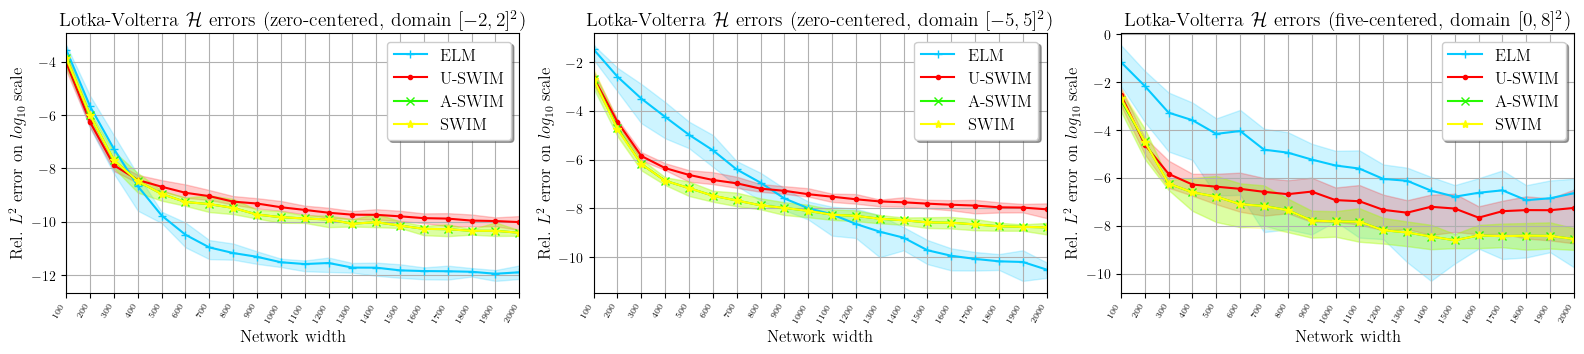

In [4]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,6*golden_ratio), dpi=100)

# left plot on domain [-2,2]^2 zero centered
error_means, error_lows, error_highs, _, _, _ = get_experiment_results(prefix="small_domain_zero_centered")

ax1.set_title(r"Lotka-Volterra $\mathcal{H}$ errors (zero-centered, domain $[-2,2]^2$)")
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax1.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(NETWORK_WIDTHS)
ax1.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax1.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax1.set_xlabel(r"Network width")
ax1.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax1.grid()

# middle plot on domain [-5,5]^2 zero centered
error_means, error_lows, error_highs, time_means, time_lows, time_highs = get_experiment_results(prefix="large_domain_zero_centered")

ax2.set_title(r"Lotka-Volterra $\mathcal{H}$ errors (zero-centered, domain $[-5,5]^2$)")
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax2.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(NETWORK_WIDTHS)
ax2.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax2.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax2.set_xlabel(r"Network width")
ax2.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax2.grid()

# right plot on domain [0,8]^2 
error_means, error_lows, error_highs, time_means, time_lows, time_highs = get_experiment_results(prefix="five_centered")

ax3.set_title(r"Lotka-Volterra $\mathcal{H}$ errors (five-centered, domain $[0,8]^2$)")
ax3.plot(NETWORK_WIDTHS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax3.plot(NETWORK_WIDTHS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax3.plot(NETWORK_WIDTHS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax3.plot(NETWORK_WIDTHS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax3.fill_between(NETWORK_WIDTHS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax3.set_xticks(NETWORK_WIDTHS)
ax3.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax3.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax3.set_xlabel(r"Network width")
ax3.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax3.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax3.grid()
fig.tight_layout()
fig.savefig("plots/lotka-volterra-errors.pdf")

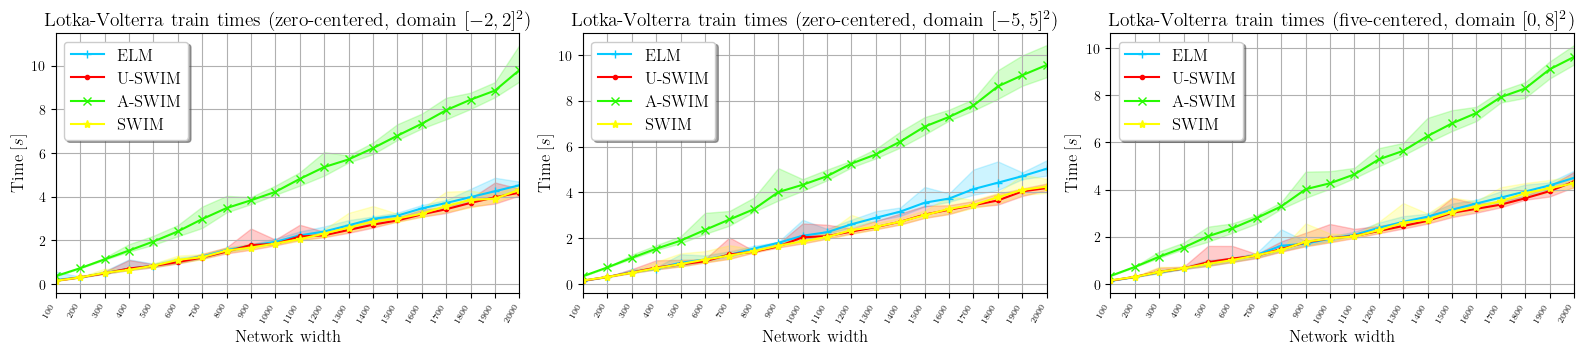

In [5]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16,6*golden_ratio), dpi=100)

# left plot on domain [-2,2]^2 zero centered
_, _, _, time_means, time_lows, time_highs = get_experiment_results(prefix="small_domain_zero_centered")

ax1.set_title(r"Lotka-Volterra train times (zero-centered, domain $[-2,2]^2$)")
ax1.plot(NETWORK_WIDTHS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax1.plot(NETWORK_WIDTHS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax1.plot(NETWORK_WIDTHS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax1.plot(NETWORK_WIDTHS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(NETWORK_WIDTHS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(NETWORK_WIDTHS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(NETWORK_WIDTHS)
ax1.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax1.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax1.set_xlabel(r"Network width")
ax1.set_ylabel(r"Time $[s]$")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax1.grid()

# middle plot on domain [-5,5]^2 zero centered
_, _, _, time_means, time_lows, time_highs = get_experiment_results(prefix="large_domain_zero_centered")

ax2.set_title(r"Lotka-Volterra train times (zero-centered, domain $[-5,5]^2$)")
ax2.plot(NETWORK_WIDTHS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax2.plot(NETWORK_WIDTHS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax2.plot(NETWORK_WIDTHS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax2.plot(NETWORK_WIDTHS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(NETWORK_WIDTHS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(NETWORK_WIDTHS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(NETWORK_WIDTHS)
ax2.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax2.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax2.set_xlabel(r"Network width")
ax2.set_ylabel(r"Time $[s]$")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax2.grid()

# right plot on domain [0,8]^2 
_, _, _, time_means, time_lows, time_highs = get_experiment_results(prefix="five_centered")

ax3.set_title(r"Lotka-Volterra train times (five-centered, domain $[0,8]^2$)")

#ax3.plot(NETWORK_WIDTHS, np.log(NETWORK_WIDTHS)/np.log(80), '--', color='grey', linewidth=1)

#ax3.plot(NETWORK_WIDTHS, np.log(NETWORK_WIDTHS),'--', color='grey', linewidth=1)
#ax3.plot(NETWORK_WIDTHS, np.sqrt(NETWORK_WIDTHS))

ax3.plot(NETWORK_WIDTHS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax3.plot(NETWORK_WIDTHS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax3.plot(NETWORK_WIDTHS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax3.plot(NETWORK_WIDTHS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax3.fill_between(NETWORK_WIDTHS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax3.fill_between(NETWORK_WIDTHS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax3.set_xticks(NETWORK_WIDTHS)
ax3.set_xticklabels(NETWORK_WIDTHS, rotation=60, ha="right", fontsize=6)
ax3.set_xlim([np.min(NETWORK_WIDTHS), np.max(NETWORK_WIDTHS)])
ax3.set_xlabel(r"Network width")
ax3.set_ylabel(r"Time $[s]$")
ax3.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], fontsize="medium", shadow=True, loc="best")
ax3.grid()
fig.tight_layout()
fig.savefig("plots/lotka-volterra-train-times.pdf")

# Analyzing traditional gradient-descent trained HNN

In [6]:
# Analyze the error at network width 1000
error_means, _, _, time_means, _, _ = get_experiment_results(prefix="small_domain_zero_centered")

print("Errors at network width 1000")
index = 9 # network width 1000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") 
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Corresponding mean train times")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 1000
ELM    :  3.04E-12
U-SWIM :  3.49E-10
A-SWIM :  1.48E-10
SWIM   :  1.48E-10
----------------
Corresponding mean train times
ELM    :  1.9
U-SWIM :  1.8
A-SWIM :  4.2
SWIM   :  1.9


In [7]:
# Train a traditional network for comparison for the smaller zero-centered domain

from data import get_train_test_set
from hamiltonian.lotka_volterra import LotkaVolterra
from activation import ActivationType
from model.hnn import HNN
from trainer.sampler import Sampler
from trainer.traditional_trainer import TraditionalTrainer
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from time import time 
import torch

experiment: SampledExperiment = load("experiments/lotka-volterra/small_domain_zero_centered_experiment_hidden_1000.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

lotka_volterra = LotkaVolterra(alpha=-2., beta=-1., gamma=-1., delta=-1.)

torch.set_default_dtype(torch.float64)

print("-> setting up domain")
train_set, test_set = get_train_test_set(1, lotka_volterra, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( ((train_inputs, _), train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set

print("-> training a traditional HNN")
hnn = HNN(input_dim=2, hidden_dim=model_params.network_width, activation=ActivationType.TANH, random_seed=model_params.start_model_random_seed)

total_steps = 15000
batch_size = 2048
learning_rate = 5e-04
weight_decay = 1e-13

traditional_trainer = TraditionalTrainer(total_steps, batch_size, learning_rate, weight_decay, DeviceType.GPU)

time_begin = time()
traditional_trainer.train(hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.GPU)
time_end = time()

time_hnn = time_end - time_begin 
error_hnn = hnn.evaluate_H(test_inputs, test_H_truths); assert isinstance(error_hnn, float)

print(f"HNN error        : {error_hnn : .2E}")
print(f"HNN train time   : {time_hnn : .1f}")

-> setting up domain
-> training a traditional HNN
Step No. : Loss (Squared L2 Error)
-> Loss at step 0	:	3.8877587391592288
-> Loss at step 1000	:	0.046906149236432
-> Loss at step 2000	:	0.009898455339045216
-> Loss at step 3000	:	0.0035567239277532344
-> Loss at step 4000	:	0.0012523975769000262
-> Loss at step 5000	:	0.0005091054569857586
-> Loss at step 6000	:	0.00025150361209023563
-> Loss at step 7000	:	0.00013506701952174617
-> Loss at step 8000	:	0.00012022952854758647
-> Loss at step 9000	:	7.380870989263969e-05
-> Loss at step 10000	:	5.603083394221333e-05
-> Loss at step 11000	:	4.842631601629513e-05
-> Loss at step 12000	:	2.723845929221621e-05
-> Loss at step 13000	:	3.486674269876119e-05
-> Loss at step 14000	:	2.5098102520632577e-05
HNN error        :  2.35E-03
HNN train time   :  94.3


In [8]:
# Analyze the error at network width 1000
error_means, _, _, time_means, _, _ = get_experiment_results(prefix="large_domain_zero_centered")

print("Errors at network width 1000")
index = 9 # network width 1000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") 
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Corresponding mean train times")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 1000
ELM    :  1.02E-08
U-SWIM :  3.85E-08
A-SWIM :  7.99E-09
SWIM   :  7.99E-09
----------------
Corresponding mean train times
ELM    :  2.1
U-SWIM :  2.0
A-SWIM :  4.3
SWIM   :  1.9


In [9]:
# Train a traditional network for comparison for the larger zero-centered domain

from data import get_train_test_set
from hamiltonian.lotka_volterra import LotkaVolterra
from activation import ActivationType
from model.hnn import HNN
from trainer.sampler import Sampler
from trainer.traditional_trainer import TraditionalTrainer
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from time import time 
import torch

experiment: SampledExperiment = load("experiments/lotka-volterra/large_domain_zero_centered_experiment_hidden_1000.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

lotka_volterra = LotkaVolterra(alpha=-2., beta=-1., gamma=-1., delta=-1.)

torch.set_default_dtype(torch.float64)

print("-> setting up domain")
train_set, test_set = get_train_test_set(1, lotka_volterra, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( ((train_inputs, _), train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set

print("-> training a traditional HNN")
hnn = HNN(input_dim=2, hidden_dim=model_params.network_width, activation=ActivationType.TANH, random_seed=model_params.start_model_random_seed)

total_steps = 30000
batch_size = 2048
learning_rate = 5e-04
weight_decay = 1e-13

traditional_trainer = TraditionalTrainer(total_steps, batch_size, learning_rate, weight_decay, DeviceType.GPU)

time_begin = time()
traditional_trainer.train(hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.GPU)
time_end = time()

time_hnn = time_end - time_begin 
error_hnn = hnn.evaluate_H(test_inputs, test_H_truths); assert isinstance(error_hnn, float)

print(f"HNN error        : {error_hnn : .2E}")
print(f"HNN train time   : {time_hnn : .1f}")

-> setting up domain
-> training a traditional HNN
Step No. : Loss (Squared L2 Error)
-> Loss at step 0	:	1078.4669594812615
-> Loss at step 1000	:	400.91198988990305
-> Loss at step 2000	:	126.09691751929626
-> Loss at step 3000	:	51.28761445338796
-> Loss at step 4000	:	21.664608903906036
-> Loss at step 5000	:	10.07439121209214
-> Loss at step 6000	:	4.865650667393848
-> Loss at step 7000	:	2.3730714345007993
-> Loss at step 8000	:	1.5775685925026033
-> Loss at step 9000	:	0.9186300600235031
-> Loss at step 10000	:	0.4803883461220803
-> Loss at step 11000	:	0.31391659533315364
-> Loss at step 12000	:	0.19163157425998895
-> Loss at step 13000	:	0.15457430227859634
-> Loss at step 14000	:	0.11696173714800254
-> Loss at step 15000	:	0.06620284518617216
-> Loss at step 16000	:	0.0549606562923522
-> Loss at step 17000	:	0.041932538195771696
-> Loss at step 18000	:	0.038213265848971556
-> Loss at step 19000	:	0.0395607698444637
-> Loss at step 20000	:	0.0226013873465016
-> Loss at step 21

In [10]:
# Analyze the error at network width 1000
error_means, _, _, time_means, _, _ = get_experiment_results(prefix="five_centered")

print("Errors at network width 1000")
index = 9 # network width 1000 is at index 9
print(f"ELM    : {error_means["elm"][index]   : .2E}") 
print(f"U-SWIM : {error_means["uswim"][index] : .2E}")
print(f"A-SWIM : {error_means["aswim"][index] : .2E}")
print(f"SWIM   : {error_means["swim"][index]  : .2E}")
print("----------------")
print("Corresponding mean train times")
print(f"ELM    : {time_means["elm"][index]   : .1f}") 
print(f"U-SWIM : {time_means["uswim"][index] : .1f}")
print(f"A-SWIM : {time_means["aswim"][index] : .1f}")
print(f"SWIM   : {time_means["swim"][index]  : .1f}")

Errors at network width 1000
ELM    :  3.27E-06
U-SWIM :  1.17E-07
A-SWIM :  1.51E-08
SWIM   :  1.51E-08
----------------
Corresponding mean train times
ELM    :  1.9
U-SWIM :  1.9
A-SWIM :  4.3
SWIM   :  1.9


In [11]:
# Train a traditional network for comparison for the five-centered domain

from data import get_train_test_set
from hamiltonian.lotka_volterra import LotkaVolterra
from activation import ActivationType
from model.hnn import HNN
from trainer.sampler import Sampler
from trainer.traditional_trainer import TraditionalTrainer
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from time import time 
import torch

experiment: SampledExperiment = load("experiments/lotka-volterra/five_centered_experiment_hidden_1000.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

lotka_volterra = LotkaVolterra(alpha=3.5, beta=0.025, gamma=10., delta=0.07)

torch.set_default_dtype(torch.float64)

print("-> setting up domain")
train_set, test_set = get_train_test_set(1, lotka_volterra, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( ((train_inputs, _), train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set

print("-> training a traditional HNN")
hnn = HNN(input_dim=2, hidden_dim=model_params.network_width, activation=ActivationType.TANH, random_seed=model_params.start_model_random_seed)

total_steps = 30000
batch_size = 2048
learning_rate = 5e-04
weight_decay = 1e-13

traditional_trainer = TraditionalTrainer(total_steps, batch_size, learning_rate, weight_decay, DeviceType.GPU)

time_begin = time()
traditional_trainer.train(hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.GPU)
time_end = time()

time_hnn = time_end - time_begin 
error_hnn = hnn.evaluate_H(test_inputs, test_H_truths); assert isinstance(error_hnn, float)

print(f"HNN error        : {error_hnn : .2E}")
print(f"HNN train time   : {time_hnn : .1f}")

-> setting up domain
-> training a traditional HNN
Step No. : Loss (Squared L2 Error)
-> Loss at step 0	:	1334.5096645601375
-> Loss at step 1000	:	861.5949526320366
-> Loss at step 2000	:	313.4166967789756
-> Loss at step 3000	:	134.61083064754507
-> Loss at step 4000	:	61.86709438529168
-> Loss at step 5000	:	31.946233352634593
-> Loss at step 6000	:	19.32141803588035
-> Loss at step 7000	:	8.904779498176646
-> Loss at step 8000	:	6.086652139183984
-> Loss at step 9000	:	3.7213091303136068
-> Loss at step 10000	:	2.5713394554179727
-> Loss at step 11000	:	1.9712323507139353
-> Loss at step 12000	:	1.07038952878348
-> Loss at step 13000	:	1.014674631742721
-> Loss at step 14000	:	0.7223504339255751
-> Loss at step 15000	:	0.5385802498561912
-> Loss at step 16000	:	0.5049615836270048
-> Loss at step 17000	:	0.30452603226014996
-> Loss at step 18000	:	0.3438836472227599
-> Loss at step 19000	:	0.3087215453237052
-> Loss at step 20000	:	0.20847808634971762
-> Loss at step 21000	:	0.22152